In [2]:
# %run "../../../common/0_notebooks_base_setup.py"   

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [3]:
## [BORRAR_PRESENCIAL]

import numpy as np

# local:
data_location = '../Data/sales_data_sample_excercise.csv'

data = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype= str)
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [4]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

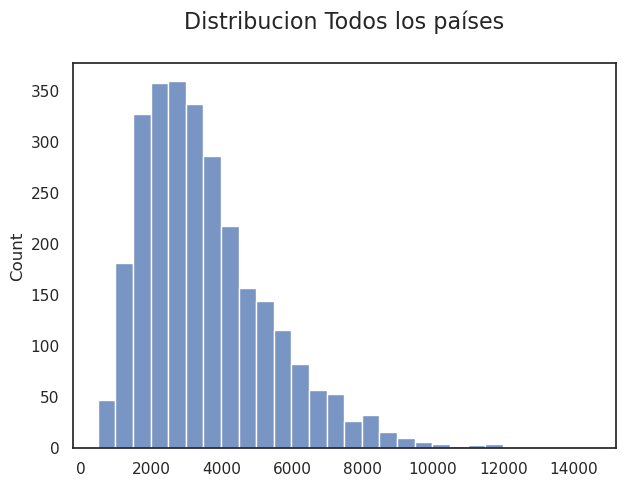

In [5]:
## [BORRAR_PRESENCIAL]
sales_vector = data[:, 1].astype(float)

distribution_plotter(sales_vector, 'Todos los países')

In [6]:
## [BORRAR_PRESENCIAL]

country_vector = data[:, 5]

paises_unicos = np.unique(country_vector)
print(paises_unicos)

['Australia' 'Austria' 'Belgium' 'Canada' 'Denmark' 'Finland' 'France'
 'Germany' 'Ireland' 'Italy' 'Japan' 'Norway' 'Philippines' 'Singapore'
 'Spain' 'Sweden' 'Switzerland' 'UK' 'USA']


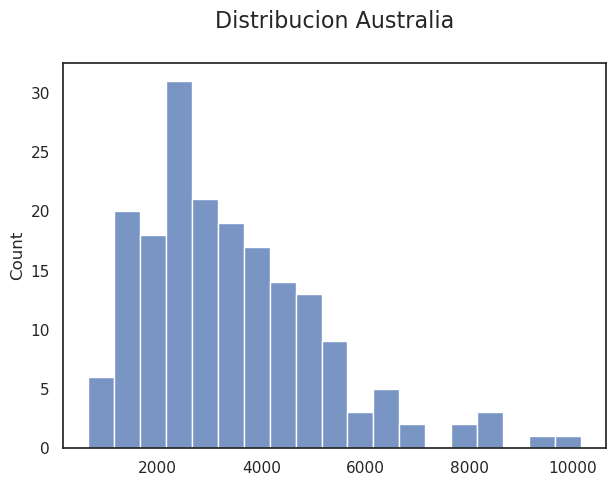

In [7]:
## [BORRAR_PRESENCIAL]

ventas_Australia_mask = country_vector == 'Australia'
precios_Australia = sales_vector[ventas_Australia_mask]
distribution_plotter(precios_Australia, 'Australia')

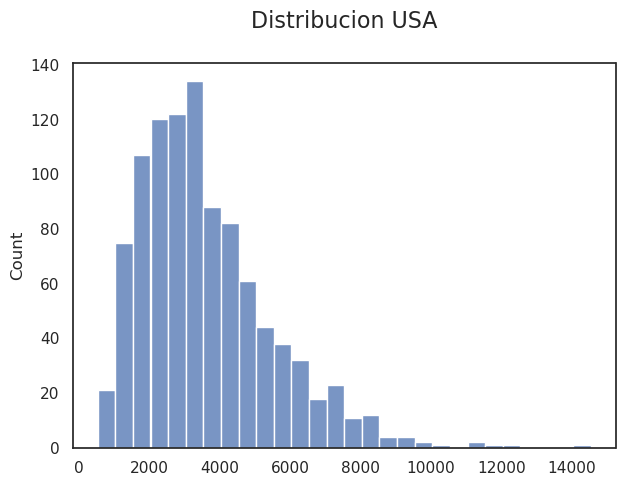

In [8]:
## [BORRAR_PRESENCIAL]

ventas_USA_mask = country_vector == 'USA'
precios_USA = sales_vector[ventas_USA_mask]
distribution_plotter(precios_USA, 'USA')


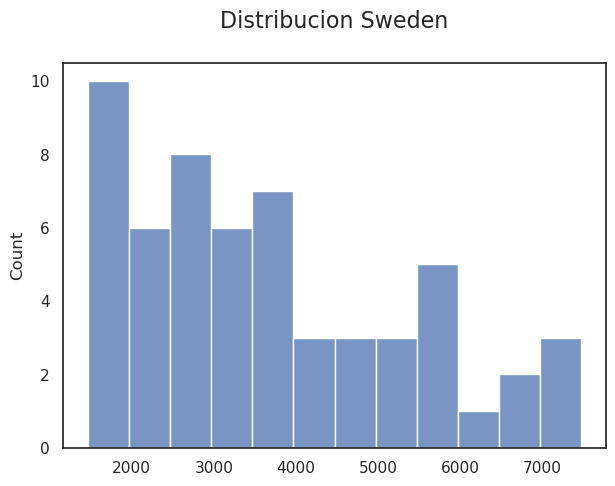

In [9]:
## [BORRAR_PRESENCIAL]

ventas_Sweden_mask = country_vector == 'Sweden'
precios_Sweden = sales_vector[ventas_Sweden_mask]
distribution_plotter(precios_Sweden, 'Sweden')

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [10]:
## [BORRAR_PRESENCIAL]

print("Media de precios Sweden:", np.around(np.mean(precios_Sweden), 2))
print("Mediana de precios Sweden:", np.around(np.median(precios_Sweden), 2))
print("Rango de precios Sweden:", np.around(np.max(precios_Sweden) - np.min(precios_Sweden), 2))
print("Desvío de precios Sweden:", np.around(np.std(precios_Sweden), 2))
print("------")

print("Media de precios USA:", np.around(np.mean(precios_USA), 2))
print("Mediana de precios USA:", np.around(np.median(precios_USA), 2))
print("Rango de precios USA:", np.around(np.max(precios_USA) - np.min(precios_USA), 2))
print("Desvío de precios USA:", np.around(np.std(precios_USA), 2))
print("------")

print("Media de precios Australia:", np.around(np.mean(precios_Australia), 2))
print("Mediana de precios Australia:", np.around(np.median(precios_Australia), 2))
print("Rango de precios Australia:", np.around(np.max(precios_Australia) - np.min(precios_Australia), 2))
print("Desvío de precios Australia:", np.around(np.std(precios_Australia), 2))
print("------")

print("Media de precios (Todos los países):", np.around(np.mean(sales_vector), 2))
print("Mediana de precios (Todos los países):", np.around(np.median(sales_vector), 2))
print("Rango de precios (Todos los países):", np.around(np.max(sales_vector) - np.min(sales_vector), 2))
print("Desvío de precios (Todos los países):", np.around(np.std(sales_vector), 2))
print("------")



Media de precios Sweden: 3684.46
Mediana de precios Sweden: 3256.96
Rango de precios Sweden: 5741.63
Desvío de precios Sweden: 1666.02
------
Media de precios USA: 3613.53
Mediana de precios USA: 3236.06
Rango de precios USA: 13541.66
Desvío de precios USA: 1880.0
------
Media de precios Australia: 3408.77
Mediana de precios Australia: 3070.4
Rango de precios Australia: 9121.68
Desvío de precios Australia: 1749.41
------
Media de precios (Todos los países): 3553.89
Mediana de precios (Todos los países): 3184.8
Rango de precios (Todos los países): 13600.67
Desvío de precios (Todos los países): 1841.54
------
